In [1]:
import os

In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
matplotlib.style.use("ggplot")



import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
data_folder = "Data/hotel-id-2021-fgvc8/train.csv"

image_folder = "Data/hotel-id-2021-fgvc8/"

In [6]:
train_df = pd.read_csv(data_folder,parse_dates=["timestamp"])

In [7]:
train_df

,image,chain,hotel_id,timestamp
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22
...,...,...,...,...
97551,ffff8082ec219892.jpg,83,20544,2016-12-18 03:04:54
97552,ffff8200e50cc0f1.jpg,82,51053,2018-01-23 03:51:42
97553,ffff84129981a4a4.jpg,83,42842,2017-03-30 22:45:24
97554,ffff85015040c2af.jpg,82,6261,2016-11-09 12:34:06


In [8]:
print("Number of records: {}".format(len(train_df)))
print("Number of images: {}".format(train_df["image"].unique().size))
print("Number of chains: {}".format(train_df["chain"].unique().size))
print("Number of hotels: {}".format(train_df["hotel_id"].unique().size))
print("Newest image: {}".format(train_df["timestamp"].max()))
print("Oldest image: {}".format(train_df["timestamp"].min()))

Number of records: 97556
Number of images: 97554
Number of chains: 88
Number of hotels: 7770
Newest image: 2020-10-16 04:22:30
Oldest image: 2015-07-06 14:57:38


In [9]:
train_df[train_df["image"].duplicated(keep=False)]

,image,chain,hotel_id,timestamp
56845,c7c7383898d76598.jpg,6,60918,2020-07-18 00:03:38
56846,c7c7383898d76598.jpg,6,60918,2020-08-29 04:35:13
62238,ce27d36c9147cc19.jpg,6,60918,2020-07-18 00:03:38
62239,ce27d36c9147cc19.jpg,6,60918,2020-08-29 04:35:13


Connecting Images to the Data Frame and writing show images function

In [10]:
from PIL import Image
def open_image(row_df):
    return Image.open(f"{image_folder}train_images/{row_df.chain.astype(int)}/{row_df.image}")


def select_data(data_df, chain_id, hotel_id, N):   
    if hotel_id is not None:
        sub_df = data_df[data_df["hotel_id"] == hotel_id]
    elif chain_id is not None:
        sub_df = data_df[data_df["chain"] == chain_id]
    else:
        sub_df = data_df
        
    if N is not None:
        sub_df = sub_df.sample(N)
    
    return sub_df


def show_images(data_df, nrows=None, ncols=None, fig_title=None):
    N = len(data_df)
    
    if nrows is None:
        nrows = 1
    if ncols is None:
        ncols = N
    
    fig, axs = plt.subplots(nrows, ncols, figsize=(24,int(5*nrows)))
    if not isinstance(axs, np.ndarray):
        axs = np.array(axs)
        
    axs = axs.ravel()
    
    for i in range(0, N):
        row_df = data_df.iloc[i]
        image = open_image(row_df)
        axs[i].imshow(image)
        axs[i].set_title(f"{row_df.chain}:{row_df.hotel_id}:{row_df.image}\n" + 
                          f"Time: {row_df.timestamp}\n" + 
                          f"Size: {np.shape(image)}")
        axs[i].axis("off")
        
    if fig_title is not None:
        fig.suptitle(fig_title, fontsize=16)

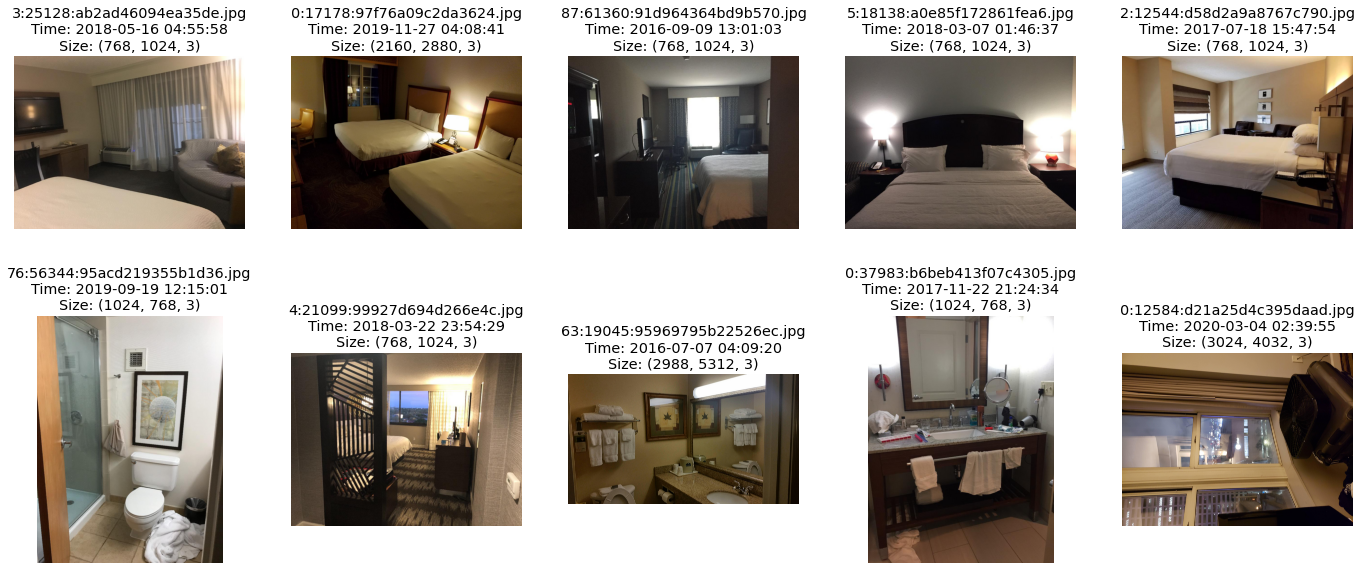

In [11]:
sample_df = select_data(train_df, None, None, 10)
show_images(sample_df, 2, 5)

In [14]:
train_df

,image,chain,hotel_id,timestamp
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22
...,...,...,...,...
97551,ffff8082ec219892.jpg,83,20544,2016-12-18 03:04:54
97552,ffff8200e50cc0f1.jpg,82,51053,2018-01-23 03:51:42
97553,ffff84129981a4a4.jpg,83,42842,2017-03-30 22:45:24
97554,ffff85015040c2af.jpg,82,6261,2016-11-09 12:34:06


In [22]:
hotel_chain = pd.read_csv("Data/hotel-id-2021-fgvc8/Hotel_list3.csv")

In [23]:
hotel_chain

,Hotel Name
0,Unaffiliated / Unknown
1,Fairfield Inn and Suites
2,Courtyard
3,Residence Inn
4,SpringHill Suites
...,...
87,Knights Inn
88,Baymont Inn
89,Howard Johnson
90,La Quinta


In [35]:
train_df

,image,chain,hotel_id,timestamp,Hotel_Name
0,8000d59f6a3d765f.jpg,85,24607,2018-11-28 05:42:31,85
1,8000febe81817f7f.jpg,6,25389,2017-01-01 07:01:46,6
2,80053befc2d42fba.jpg,3,672,2018-01-26 13:22:07,3
3,8007fa0a8fe89f9d.jpg,5,63866,2020-07-03 02:31:31,5
4,800a4a6b6f6d2df6.jpg,0,12036,2017-09-22 17:59:22,0
...,...,...,...,...,...
97551,ffff8082ec219892.jpg,83,20544,2016-12-18 03:04:54,83
97552,ffff8200e50cc0f1.jpg,82,51053,2018-01-23 03:51:42,82
97553,ffff84129981a4a4.jpg,83,42842,2017-03-30 22:45:24,83
97554,ffff85015040c2af.jpg,82,6261,2016-11-09 12:34:06,82


In [37]:

namelist =[]
for name in hotel_chain["Hotel Name"]:
    namelist.append(name)
    

['Unaffiliated  / Unknown',
 'Fairfield Inn and Suites',
 'Courtyard',
 'Residence Inn',
 'SpringHill Suites',
 'TownePlace Suites',
 'Marriot Hotels and Resorts',
 'Sheraton Hotels and Resorts',
 'Four Points',
 'Aloft Hotels',
 'Westin Hotels and Resorts',
 'Marriot Autograph Collection',
 'AC Hotels',
 'Renaissance Hotels',
 'Delta Hotels',
 'Element Hotels',
 'Marriot Vacation club',
 'The Ritz-Carlton',
 'JW Marriot',
 'Tribute Portfolio',
 'W Hotels',
 'Moxy Hotels',
 'Le Meridien',
 'Marriot Luxury Collection',
 'Hampton',
 'Hilton Garden Inn',
 'Homewood Suites',
 'Home2Suites',
 'DoubleTree',
 'Hilton Hotels and Resorts',
 'Embassy Suites',
 'Tru',
 'Curio',
 'Tapestry',
 'Canopy',
 'Waldorf Astoria',
 'Conrad Hotels and Resorts',
 'Holiday Inn Express and Suites',
 'Holiday Inn and Suites',
 'Candlewood Suites',
 'Staybridge Suites',
 'Crowne Plaza',
 'Hotel Indigo',
 'Kimpton',
 'Military Independent Brand',
 'Avid Hotels',
 'InterContinental Hotels',
 'Holiday Inn club Vaca

In [ ]:
K.clear_session()
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_3class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_3class.hdf5')